#Stock Price prediction using Facebook Prophet 

## Importing all the necessary Libraries

In [12]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [13]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [14]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [15]:
!pip install yfinance

In [16]:
import yfinance as yf

In [17]:
#read_csv function from pandas
raw_data = yf.download(tickers='AAPL', period='5y')
df = raw_data.copy()

[*********************100%***********************]  1 of 1 completed


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-12-22 to 2021-12-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,73.874851,74.684408,73.104978,73.935288,72.745898,1.210834e+08
std,40.039592,40.533545,39.540767,40.061686,40.546151,5.613778e+07
min,28.897499,29.082500,28.690001,28.955000,27.254818,4.100000e+07
25%,42.900001,43.268751,42.527499,42.845624,41.288659,8.384020e+07
50%,53.577501,54.243750,53.003752,53.577499,52.120838,1.062371e+08
75%,115.267500,116.625002,113.617502,115.147499,114.356503,1.410324e+08
max,181.119995,182.130005,175.529999,179.449997,179.449997,4.479400e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [20]:
#Line graph, Area graph , box plot (Analyzing price and volume)
px.area(df, x=df.index, y=df.Close)

In [21]:
px.line(df, x=df.index, y=df.Close)

In [22]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [23]:
px.area(df, x=df.index, y=df.Volume)

In [24]:
px.bar(df, y=df.Volume)

In [25]:
px.box(df, y=df.Close)

# Understanding Facebook Prophet

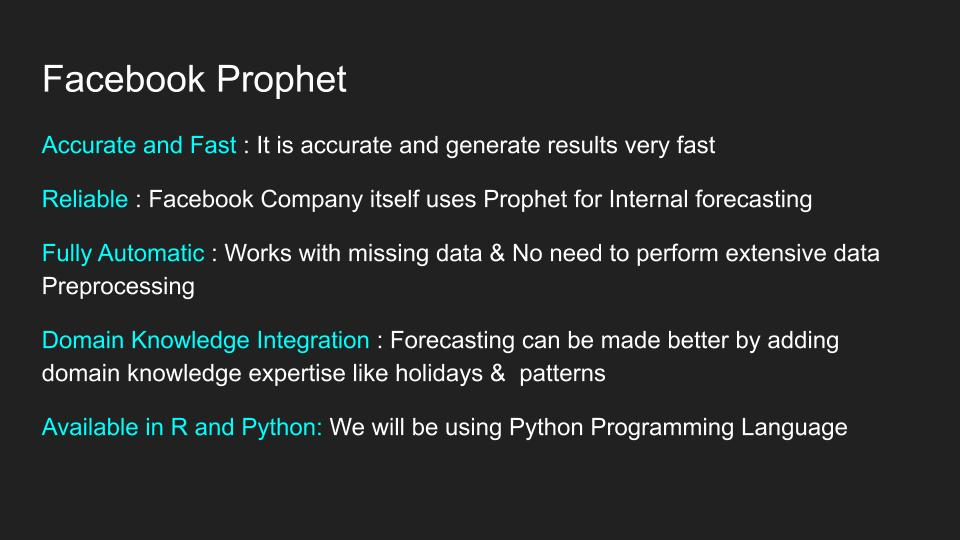

## Data Preparation

In [26]:
df1 = pd.DataFrame(df, columns=['Close'])
df1.reset_index(drop=False, inplace=True)

In [27]:
prophet_df = df1.rename(columns={'Date':'ds', 'Close':'y'})

In [28]:
prophet_df

,ds,y
0,2016-12-22,29.072500
1,2016-12-23,29.129999
2,2016-12-27,29.315001
3,2016-12-28,29.190001
4,2016-12-29,29.182501
...,...,...
1253,2021-12-15,179.300003
1254,2021-12-16,172.259995
1255,2021-12-17,171.139999
1256,2021-12-20,169.750000


In [29]:
size = int(len(prophet_df)*0.8)
df_train, df_test = prophet_df[:size], prophet_df[size:len(prophet_df)]

## Creating Facebook Prophet Model

In [30]:
m = Prophet()
m.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [31]:
df_test.head()

,ds,y
1006,2020-12-22,131.880005
1007,2020-12-23,130.960007
1008,2020-12-24,131.970001
1009,2020-12-28,136.690002
1010,2020-12-29,134.869995


In [32]:
df_train.tail()

,ds,y
1001,2020-12-15,127.879997
1002,2020-12-16,127.809998
1003,2020-12-17,128.699997
1004,2020-12-18,126.660004
1005,2020-12-21,128.229996


In [33]:
len(df_test)

252

In [43]:
future = m.make_future_dataframe(periods=len(df_test))
forecast = m.predict(future)

In [44]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-12-22,29.198509,24.740892,35.228636,29.198509,29.198509,0.805239,0.805239,0.805239,0.097067,0.097067,0.097067,0.708172,0.708172,0.708172,0.0,0.0,0.0,30.003748
1,2016-12-23,29.289163,24.973086,35.138948,29.289163,29.289163,0.642575,0.642575,0.642575,-0.031066,-0.031066,-0.031066,0.673641,0.673641,0.673641,0.0,0.0,0.0,29.931738
2,2016-12-27,29.651778,25.166292,35.051139,29.651778,29.651778,0.606741,0.606741,0.606741,0.125071,0.125071,0.125071,0.481671,0.481671,0.481671,0.0,0.0,0.0,30.258519
3,2016-12-28,29.742431,25.346992,35.323714,29.742431,29.742431,0.604577,0.604577,0.604577,0.176682,0.176682,0.176682,0.427895,0.427895,0.427895,0.0,0.0,0.0,30.347008
4,2016-12-29,29.833085,25.232516,35.138064,29.833085,29.833085,0.472247,0.472247,0.472247,0.097067,0.097067,0.097067,0.375181,0.375181,0.375181,0.0,0.0,0.0,30.305332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-08-26,170.583811,158.749091,196.748681,151.886173,187.805581,7.994664,7.994664,7.994664,0.097067,0.097067,0.097067,7.897597,7.897597,7.897597,0.0,0.0,0.0,178.578475
1254,2021-08-27,170.765745,159.651968,197.466303,151.935864,188.113051,7.934819,7.934819,7.934819,-0.031066,-0.031066,-0.031066,7.965885,7.965885,7.965885,0.0,0.0,0.0,178.700565
1255,2021-08-28,170.947680,159.204164,195.663494,151.989285,188.414666,7.812485,7.812485,7.812485,-0.177275,-0.177275,-0.177275,7.989760,7.989760,7.989760,0.0,0.0,0.0,178.760165
1256,2021-08-29,171.129614,158.755108,197.907836,152.092785,188.636429,7.791524,7.791524,7.791524,-0.177275,-0.177275,-0.177275,7.968799,7.968799,7.968799,0.0,0.0,0.0,178.921138


In [45]:
px.line(forecast, x='ds', y='yhat')

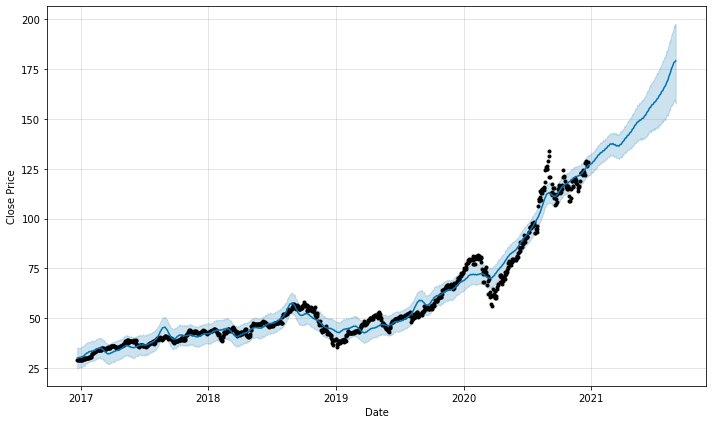

In [46]:
figure = m.plot(forecast, xlabel='Date', ylabel='Close Price')

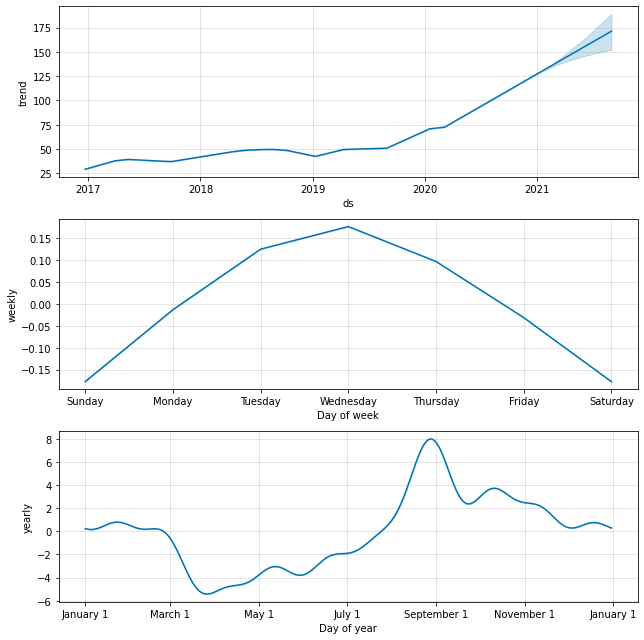

In [47]:
figure2 = m.plot_components(forecast)

In [48]:
import matplotlib.pyplot as plt

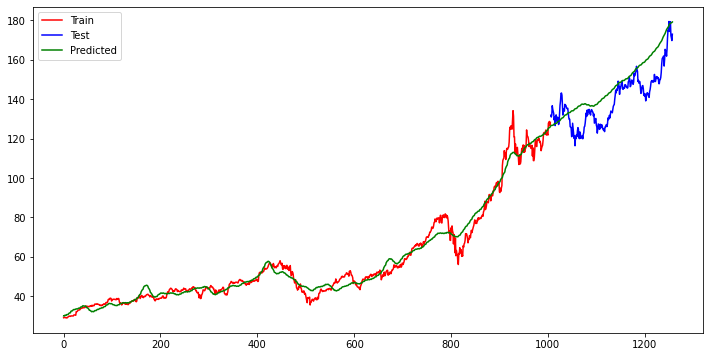

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_train.y, color='red', label="Train")
ax.plot(df_test.y, color='blue', label="Test")
ax.plot(forecast.yhat, color='green', label="Predicted")
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [54]:
rmse = np.sqrt(mean_squared_error(forecast.yhat, prophet_df.y))
rmse

5.867328526622474